In [ ]:
#loan status prediction with python
# data->pre-processing->train test split->support vector machine model->trained support vector machine
# model(new data)->approved or rejected

IMPORTING THE DEPENDENCIES


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [4]:
loan_dataset=pd.read_csv('/content/loan_data.csv')

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [7]:
loan_dataset.shape

(381, 13)

In [8]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [9]:
#number of missing value in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [10]:
#dropping the missing values
loan_dataset=loan_dataset.dropna()

In [11]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [12]:
loan_dataset.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)


<ipython-input-12-90aab21d3c5b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)


In [13]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [14]:
#dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


In [15]:
load_dataset=loan_dataset.replace(to_replace='3+', value=4)

In [16]:
load_dataset['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
4,24


<Axes: xlabel='Education', ylabel='count'>

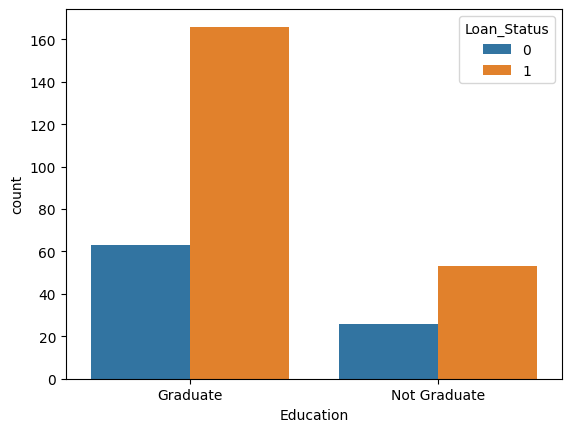

In [17]:
#education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=load_dataset)

<Axes: xlabel='Married', ylabel='count'>

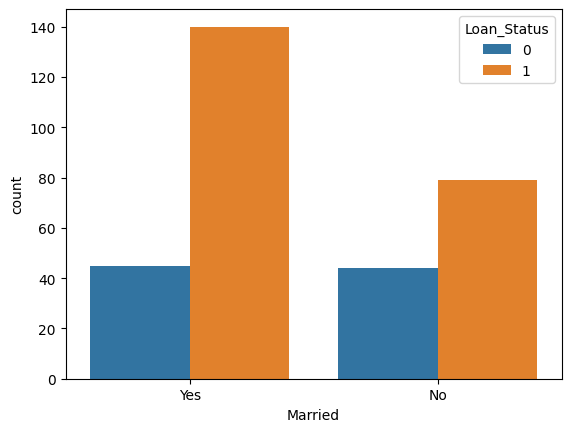

In [18]:
#marital status & loan status
sns.countplot(x='Married', hue='Loan_Status', data=load_dataset)

In [19]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-19-2563779c0ba7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self Employed':{'No':0,'Yes':1},


In [20]:
load_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [21]:
#seperating the data and label
X=load_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=load_dataset['Loan_Status']

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(308, 11) (277, 11) (31, 11)


In [23]:
classifier=svm.SVC(kernel='linear')

In [25]:
classifier.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Female'

In [26]:
#check accuracy score if >75 then acceptable
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

ValueError: could not convert string to float: 'Female'

In [27]:
#accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

ValueError: could not convert string to float: 'Female'

In [ ]:
#make a predictive model as same as we did in last project